**II.Data Wrangling**
**2.1 Data Collection**

In [ ]:
import pandas as pd
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
file_name = 'Offences recorded by ofence type and location type_2024.xlsx'
file_path = f'/content/drive/My Drive/Colab Notebooks/{file_name}'

Mounted at /content/drive


In [ ]:
# Đọc file excel
try:
  df = pd.read_excel(file_path)
  print(f"Đã tải file '{file_name}' vào DataFrame.")
except FileNotFoundError:
  print("Lỗi: Không tìm thấy file dữ liệu. Vui lòng kiểm tra lại đường dẫn và tên file.")
  # Tạo DataFrame mẫu nếu không tìm thấy file để tiếp tục ví dụ
  data = {
      'Offence Type': ['Theft', 'Burglary', 'Assault', 'Theft', 'Assault', 'Burglary', 'Theft', 'Assault'],
      'Location Type': ['Commercial', 'Residential', 'Public Place', 'Public Transport', 'Public Place', 'Residential', 'Commercial', 'Residential'],
      'Count': [150, 120, 80, 50, 70, 90, 100, 60]
  }
  df = pd.DataFrame(data)
  print("Đã tạo DataFrame mẫu để minh họa.")

Lỗi: Không tìm thấy file dữ liệu. Vui lòng kiểm tra lại đường dẫn và tên file.
Đã tạo DataFrame mẫu để minh họa.


In [ ]:
# Kiểm tra dữ liệu trong DataFrame
if 'df' in locals(): # hiển thị nếu DataFrame đã được tạo
  print("\n5 dòng đầu của dữ liệu gốc:")
  print(df.head())
  print("\Tổng quan dữ liệu gốc:")
  df.info()


5 dòng đầu của dữ liệu gốc:
  Offence Type     Location Type  Count
0        Theft        Commercial    150
1     Burglary       Residential    120
2      Assault      Public Place     80
3        Theft  Public Transport     50
4      Assault      Public Place     70
\Tổng quan dữ liệu gốc:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Offence Type   8 non-null      object
 1   Location Type  8 non-null      object
 2   Count          8 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


In [ ]:
# Data Quality Asessment
# Kiểm tra giá trị bị thiếu
print("\n Kiểm tra giá trị thiếu trong dữ liệu:")
print(df.isnull().sum())


 Kiểm tra giá trị thiếu trong dữ liệu:
Offence Type     0
Location Type    0
Count            0
dtype: int64


In [ ]:
# Kiểm tra tính nhất quán và các giá trị duy nhất trong các cột chính
print("\nCác giá trị duy nhất trong các cột liên quan đến loại tội phạm:")
print("\n'Offence Type':")
print(df['Offence Type'].unique())
# print("\n'Offence Subdivision':")
# print(df['Offence Subdivision'].unique())
# print("\n'Offence Subgroup':")
# print(df['Offence Subgroup'].unique())

print("\nCác giá trị duy nhất trong các cột liên quan đến loại địa điểm:")
# print("\n'Location Division':")
# print(df['Location Division'].unique())
# print("\n'Location Subdivision':")
# print(df['Location Subdivision'].unique())
print("\n'Location Type':")
print(df['Location Type'].unique())


Các giá trị duy nhất trong các cột liên quan đến loại tội phạm:

'Offence Type':
['Theft' 'Burglary' 'Assault']

Các giá trị duy nhất trong các cột liên quan đến loại địa điểm:

'Location Type':
['Commercial' 'Residential' 'Public Place' 'Public Transport']


In [ ]:
# Loại bỏ khoảng trắng / viết hoa đầu mỗi từ / nhóm các giá trị tương tự
df['Offence Type'] = df['Offence Type'].str.strip().str.title()
# df['Offence Subdivision'] = df['Offence Subdivision'].str.strip().str.title()
# df['Offence Subgroup'] = df['Offence Subgroup'].str.strip().str.title()
# df['Location Division'] = df['Location Division'].str.strip().str.title()
# df['Location Subdivision'] = df['Location Subdivision'].str.strip().str.title()
df['Location Type'] = df['Location Type'].str.strip().str.title()

In [ ]:
print("\nCác giá trị duy nhất trong các cột liên quan đến loại tội phạm:")
# print("\n'Offence Division':")
# print(df['Offence Division'].unique())
# print("\n'Offence Subdivision':")
# print(df['Offence Subdivision'].unique())
# print("\n'Offence Subgroup':")
# print(df['Offence Subgroup'].unique())
print("\n'Offence Type':")
print(df['Offence Type'].unique())

print("\nCác giá trị duy nhất trong các cột liên quan đến loại địa điểm:")
# print("\n'Location Division':")
# print(df['Location Division'].unique())
# print("\n'Location Subdivision':")
# print(df['Location Subdivision'].unique())
# print("\n'Location Group':")
# print(df['Location Group'].unique())
print("\n'Location Type':")
print(df['Location Type'].unique())


Các giá trị duy nhất trong các cột liên quan đến loại tội phạm:

'Offence Type':
['Theft' 'Burglary' 'Assault']

Các giá trị duy nhất trong các cột liên quan đến loại địa điểm:

'Location Type':
['Commercial' 'Residential' 'Public Place' 'Public Transport']


In [ ]:
# Kiểm tra Outlier cột Offence Count
print("\nThống kê mô tả cho cột 'Count':")
print(df['Count'].describe())


Thống kê mô tả cho cột 'Count':
count      8.000000
mean      90.000000
std       32.950179
min       50.000000
25%       67.500000
50%       85.000000
75%      105.000000
max      150.000000
Name: Count, dtype: float64


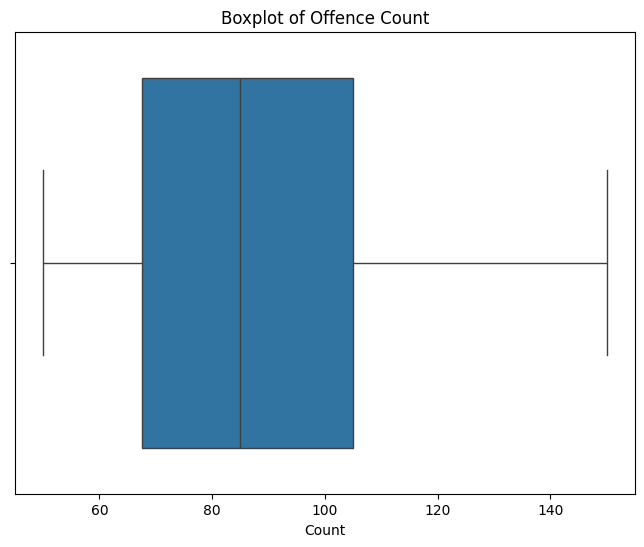

In [ ]:
# trực quan hóa bằng boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Count'])
plt.title('Boxplot of Offence Count')
plt.show()

In [ ]:
# Xác định ngưỡng cho ngoại lai nếu cần (ví dụ: dùng IQR)
Q1 = df['Count'].quantile(0.25)
Q3 = df['Count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = df[(df['Count'] < lower_bound) | (df['Count'] > upper_bound)]
print(f"\nSố lượng bản báo cáo có 'Count' là Outlier theo IQR: {len(outliers_count)}")


Số lượng bản báo cáo có 'Count' là Outlier theo IQR: 0


In [ ]:
from matplotlib import pyplot as plt
# import seaborn as sns  # Chỉ mở nếu thật sự muốn palette màu của seaborn

# —— 1. Gom nhóm & đếm số outlier theo Offence Type ——
group_sizes = outliers_count.groupby('Offence Type').size()

# —— 2. Nếu không có dữ liệu thì khỏi vẽ, tránh lỗi index ——
if group_sizes.empty:
    print("✨ Không có outlier nào – không cần vẽ biểu đồ.")
else:
    # sort_values() để cột nhỏ nằm trên, lớn nằm dưới => nhìn một phát là rõ
    ax = group_sizes.sort_values().plot(
        kind='barh',
        # color=sns.color_palette('Dark2', n_colors=len(group_sizes))  # mở nếu dùng seaborn
    )
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xlabel('Số outlier')
    ax.set_title('Số lượng Outlier theo Offence Type')
    plt.tight_layout()
    plt.show()

✨ Không có outlier nào – không cần vẽ biểu đồ.


In [ ]:
# Tỷ lệ Outlier trên tổng số báo cáo
total_records = len(df)
outlier_percentage = (len(outliers_count) / total_records) * 100

print(f"\nTổng số bản báo cáo: {total_records}")
print(f"Số lượng bản báo cáo là Outlier: {len(outliers_count)}")
print(f"Tỷ lệ bản báo cáo là Outlier: {outlier_percentage:.2f}%")


Tổng số bản báo cáo: 8
Số lượng bản báo cáo là Outlier: 0
Tỷ lệ bản báo cáo là Outlier: 0.00%


/tmp/ipython-input-13-944703403.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=offence_division_counts.index, y=offence_division_counts.values, palette='viridis')


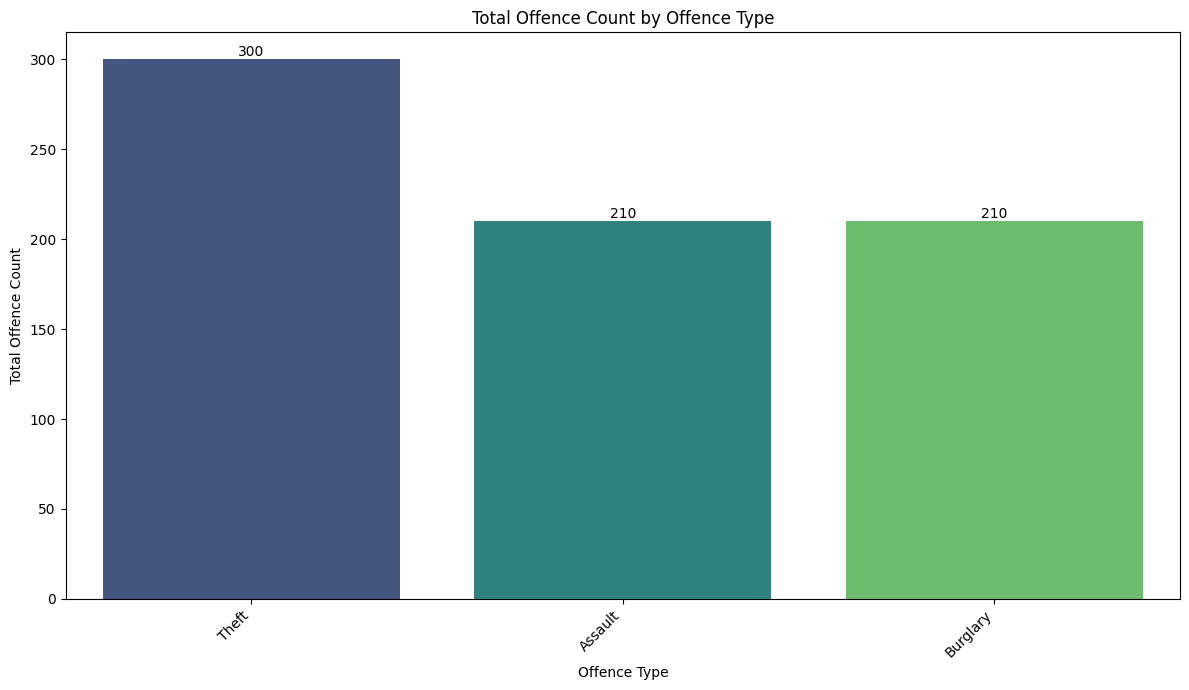

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Offence Division' and sum 'Offence Count'
offence_division_counts = df.groupby('Offence Type')['Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=offence_division_counts.index, y=offence_division_counts.values, palette='viridis')
plt.title('Total Offence Count by Offence Type')
plt.xlabel('Offence Type')
plt.ylabel('Total Offence Count')
plt.xticks(rotation=45, ha='right')

# Add the values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

/tmp/ipython-input-14-1441465882.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_subdivision_counts.index, y=location_subdivision_counts.values, palette='viridis')


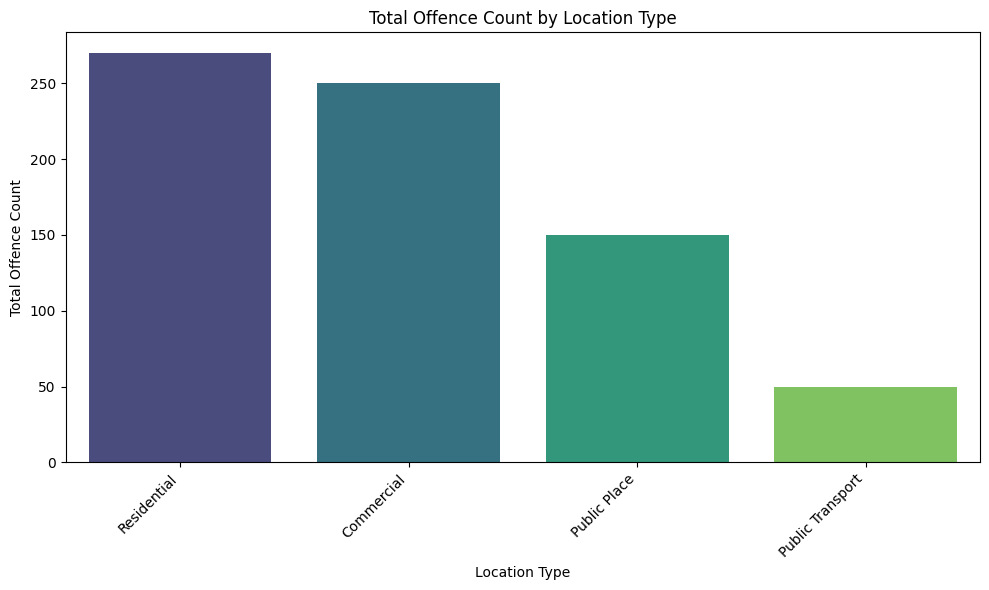

In [ ]:
# 1. Visualize the distribution of offences by Location Division.
location_subdivision_counts = df.groupby('Location Type')['Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=location_subdivision_counts.index, y=location_subdivision_counts.values, palette='viridis')
plt.title('Total Offence Count by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Total Offence Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

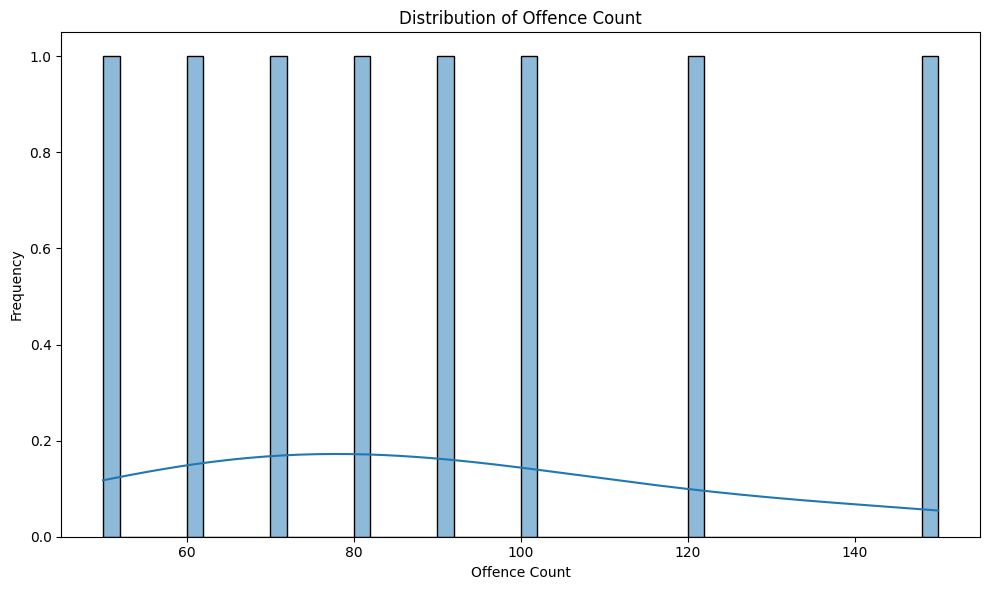

In [ ]:
# 2. Create a histogram for the 'Offence Count' data.
plt.figure(figsize=(10, 6))
sns.histplot(df['Count'], bins=50, kde=True)
plt.title('Distribution of Offence Count')
plt.xlabel('Offence Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

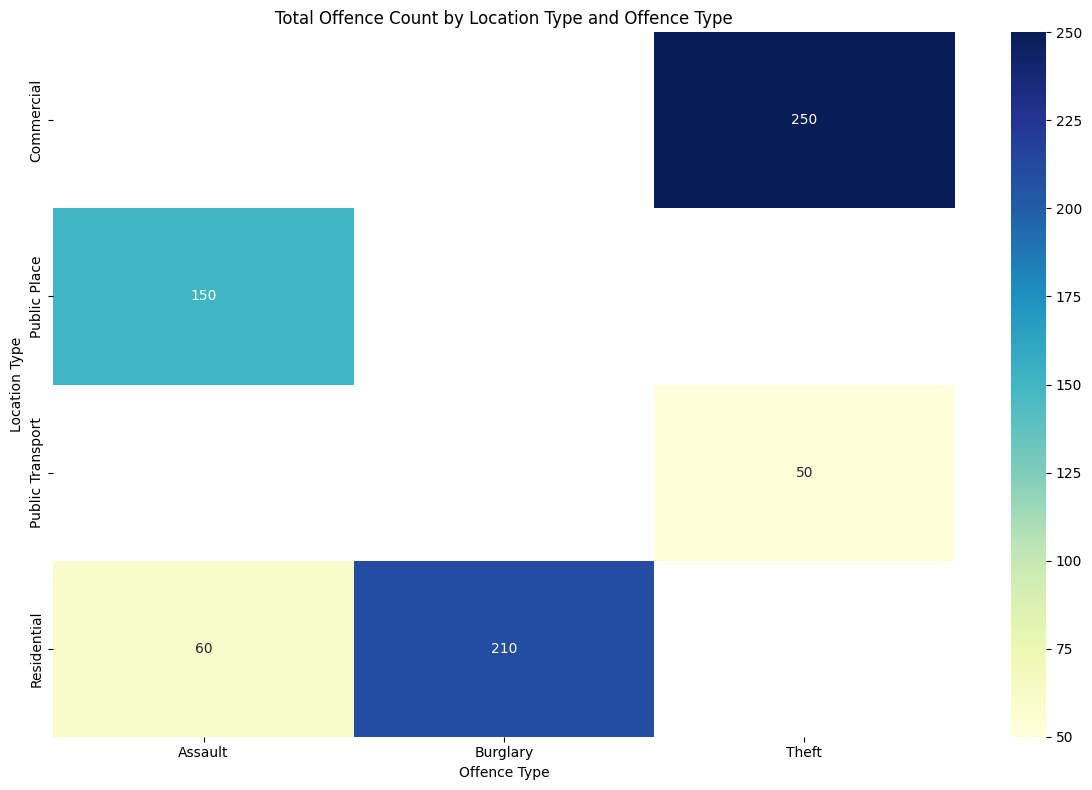

In [ ]:
# 3. Explore the relationship between 'Offence Division' and 'Location Division'.
# Create a pivot table to show the sum of 'Offence Count' for each combination
pivot_table = df.pivot_table(index='Location Type', columns='Offence Type', values='Count', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Total Offence Count by Location Type and Offence Type')
plt.xlabel('Offence Type')
plt.ylabel('Location Type')
plt.tight_layout()
plt.show()

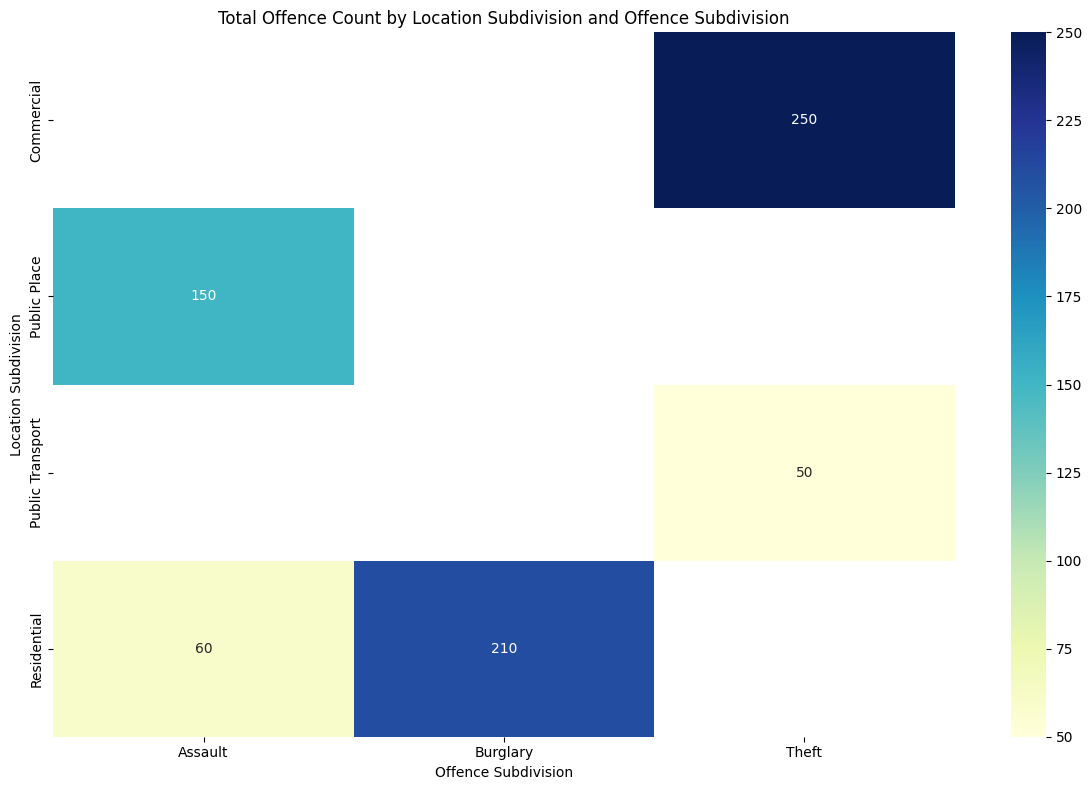

In [ ]:
pivot_table = df.pivot_table(index='Location Type', columns='Offence Type', values='Count', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Total Offence Count by Location Subdivision and Offence Subdivision')
plt.xlabel('Offence Subdivision')
plt.ylabel('Location Subdivision')
plt.tight_layout()
plt.show()

Vì đây là báo cáo về tình hình tội phạm => không cần phải xử lý các Outlier

**2.2 Data Integration & Preprocessing**

**Data Integration**


In [ ]:
# Tạo danh sách các transactions
# Mỗi Transaction sẽ là một danh sách chứa [Offence Division, Offence Subdivision, Location Subdivision]
transactions_list = []
for index, row in df.iterrows():
    offence_type = row['Offence Type']
    location_type = row['Location Type']
    count = row['Count']

    # Lặp lại 'count' lần để tạo các bản ghi riêng lẻ
    for _ in range(count):
        transactions_list.append([offence_type, location_type]) # Add Offence Type and Location Type to the list

In [ ]:
# Chuyển đổi danh sách Transaction thành DataFrame
df_transactions = pd.DataFrame(transactions_list, columns=['Offence Type', 'Location Type'])

print("\nDataFrame sau khi xử lý dữ liệu:")
print(df_transactions.head())
print(f"Kích thước dữ liệu sau khi xử lý: {df_transactions.shape}")
print(f"Tổng số Transaction được xử lý: {len(df_transactions)}")


DataFrame sau khi xử lý dữ liệu:
  Offence Type Location Type
0        Theft    Commercial
1        Theft    Commercial
2        Theft    Commercial
3        Theft    Commercial
4        Theft    Commercial
Kích thước dữ liệu sau khi xử lý: (720, 2)
Tổng số Transaction được xử lý: 720


**Missing Value Handling**

In [ ]:
# Kiểm tra số lượng giá trị thiếu trước khi xử lý
print("\nKiểm tra giá trị thiếu trước khi xử lý:")
print(df_transactions.isnull().sum())

# Loại bỏ các bản ghi có giá trị thiếu trong cột 'Offence Division', 'Offence Subdivision' hoặc 'Location Subdivision'
# df_processed = df_transactions.dropna(subset=['Offence Division', 'Offence Subdivision', 'Location Subdivision'])

print("\nKiểm tra giá trị thiếu sau khi xử lý:")
print(df_transactions.isnull().sum())
print(f"Kích thước dữ liệu sau khi loại bỏ giá trị thiếu: {df_transactions.shape}")

# if len(df_transactions) > len(df_processed):
#     print(f"Đã loại bỏ {len(df_transactions) - len(df_processed)} bản ghi do có giá trị thiếu.")
# else:
print("Không có giá trị thiếu nào được tìm thấy và loại bỏ.")


Kiểm tra giá trị thiếu trước khi xử lý:
Offence Type     0
Location Type    0
dtype: int64

Kiểm tra giá trị thiếu sau khi xử lý:
Offence Type     0
Location Type    0
dtype: int64
Kích thước dữ liệu sau khi loại bỏ giá trị thiếu: (720, 2)
Không có giá trị thiếu nào được tìm thấy và loại bỏ.


## **Outlier Detection & Treatment**
Báo cáo số lượng vụ phạm tội là dữ liệu định danh, khái niệm Outlier không áp dụng theo nghĩa thông thường
Các loại tội phạm hoặc địa điểm có tần suất xuất hiện thấp sẽ tự động được loại bỏ bởi thuật toán Apriori
=> Không cần thực hiện bước xử lý Outlier

**Data Transformation**

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Tạo danh sách các danh sách (list of lists), mỗi danh sách con là một Transaction
# Mỗi Transaction sẽ chứa hai Biến: một cho loại tội phạm và một cho loại địa điểm.
# Dùng tiền tố 'Offence_' và 'Location_' để phân biệt.
transactions_for_apriori = df_transactions.apply(lambda row: [f"Offence_{row['Offence Type']}", f"Location_{row['Location Type']}"], axis=1).tolist()

# Khởi tạo TransactionEncoder
te = TransactionEncoder()

# Fit: Học tất cả các mặt hàng (item) duy nhất từ tất cả các Transaction.
# Transform: Chuyển đổi danh sách Transaction thành ma trận One-Hot (boolean array).
te_ary = te.fit(transactions_for_apriori).transform(transactions_for_apriori)

# Chuyển đổi ma trận One-Hot thành DataFrame với tên cột là tên các Biến
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("\n5 dòng đầu của DataFrame đã mã hóa One-Hot (sẵn sàng cho Association Rule Mining):")
print(df_encoded.head())
print(f"\nKích thước DataFrame đã mã hóa: {df_encoded.shape}")
print(f"Tổng số lượng các Biến (Offence Subdivision và Location Subdivision duy nhất): {len(df_encoded.columns)}")


5 dòng đầu của DataFrame đã mã hóa One-Hot (sẵn sàng cho Association Rule Mining):
   Location_Commercial  Location_Public Place  Location_Public Transport  \
0                 True                  False                      False   
1                 True                  False                      False   
2                 True                  False                      False   
3                 True                  False                      False   
4                 True                  False                      False   

   Location_Residential  Offence_Assault  Offence_Burglary  Offence_Theft  
0                 False            False             False           True  
1                 False            False             False           True  
2                 False            False             False           True  
3                 False            False             False           True  
4                 False            False             False           True  

Kí

In [ ]:
# Exploratory Data Analysis (EDA)
import pandas as pd
try:
    if 'df_transactions' not in locals():
        raise NameError("df_transactions is not defined. Please run the Data Integration & Preprocessing section first.")
except NameError:
    print("df_transactions chưa được định nghĩa. Đang tạo dữ liệu mẫu cho mục đích minh họa.")
    data = {
        'Offence Subdivision': ['Theft', 'Burglary', 'Assault', 'Theft', 'Assault', 'Burglary', 'Theft', 'Assault', 'Robbery', 'Theft', 'Burglary', 'Theft', 'Assault', 'Theft'],
        'Location Subdivision': ['Commercial', 'Residential', 'Public Place', 'Public Transport', 'Public Place', 'Residential', 'Commercial', 'Residential', 'Street', 'Commercial', 'Residential', 'Commercial', 'Public Place', 'Residential']
    }
    # Tăng số lượng bản ghi để dữ liệu có ý nghĩa hơn cho EDA
    df_transactions = pd.DataFrame(data * 100) # Gấp 100 lần để có nhiều dữ liệu hơn


print("\n--- EDA: Phân tích thống kê ---")


--- EDA: Phân tích thống kê ---


In [ ]:
print("\nTổng quan dữ liệu sau EDA:")
df_transactions.info()


Tổng quan dữ liệu sau EDA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Offence Type   720 non-null    object
 1   Location Type  720 non-null    object
dtypes: object(2)
memory usage: 11.4+ KB


In [ ]:
# Tính tần suất xuất hiện của từng Offence Division
offence_counts = df_transactions['Offence Type'].value_counts()
print("\nLoại tội phạm:")
print(offence_counts.head(10))
print("\nPhần trăm (%) của mỗi loại tội phạm:")
print((offence_counts / len(df_transactions) * 100).head(10).round(2))


Loại tội phạm:
Offence Type
Theft       300
Burglary    210
Assault     210
Name: count, dtype: int64

Phần trăm (%) của mỗi loại tội phạm:
Offence Type
Theft       41.67
Burglary    29.17
Assault     29.17
Name: count, dtype: float64


/tmp/ipython-input-25-3202691355.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=offence_counts.head(10).index, y=offence_counts.head(10).values, palette='viridis')


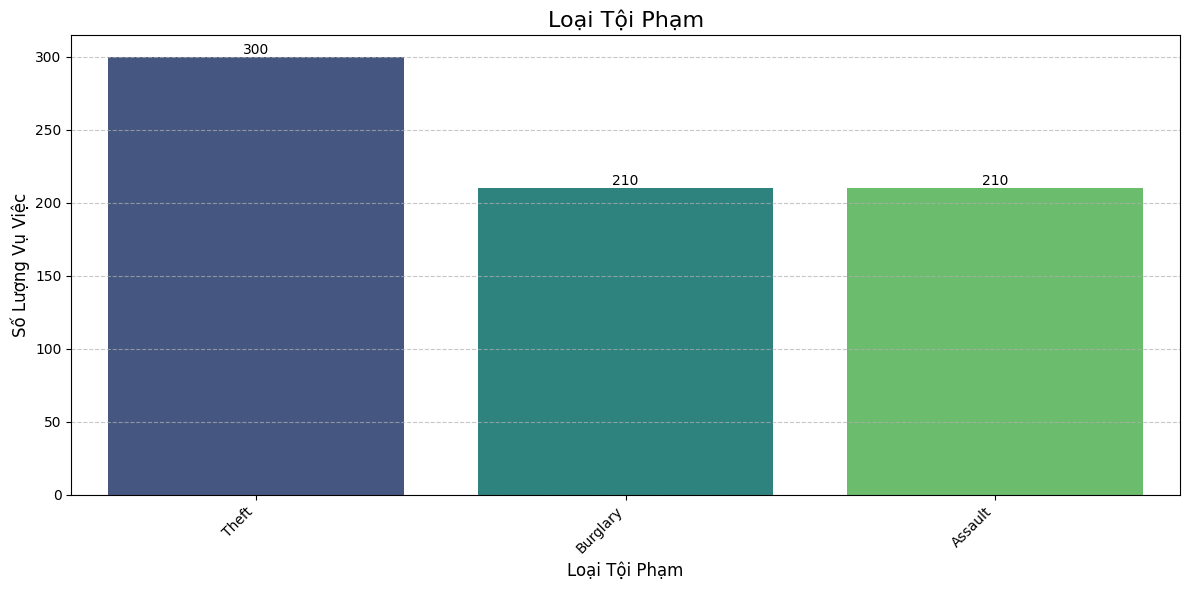

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Biểu đồ thanh cho Offence Division
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=offence_counts.head(10).index, y=offence_counts.head(10).values, palette='viridis')
plt.title('Loại Tội Phạm', fontsize=16)
plt.xlabel('Loại Tội Phạm', fontsize=12)
plt.ylabel('Số Lượng Vụ Việc', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Tính tần suất xuất hiện của từng Location Division
location_counts = df_transactions['Location Type'].value_counts()
print("\nTop 10 Loại địa điểm phổ biến nhất:")
print(location_counts.head(10))
print("\nPhần trăm (%) của mỗi loại địa điểm (Top 10):")
print((location_counts / len(df_transactions) * 100).head(10).round(2))


Top 10 Loại địa điểm phổ biến nhất:
Location Type
Residential         270
Commercial          250
Public Place        150
Public Transport     50
Name: count, dtype: int64

Phần trăm (%) của mỗi loại địa điểm (Top 10):
Location Type
Residential         37.50
Commercial          34.72
Public Place        20.83
Public Transport     6.94
Name: count, dtype: float64


In [ ]:
# Phân tích mối quan hệ ban đầu (bảng tương quan tần suất)
print("\nBảng tương quan tần suất giữa Offence Subdivision và Location Subdivision (5 dòng đầu):")
# pd.crosstab sẽ tạo một bảng tần suất đồng xuất hiện
cross_tab_freq = pd.crosstab(df_transactions['Offence Type'], df_transactions['Location Type'])
print(cross_tab_freq.head())


Bảng tương quan tần suất giữa Offence Subdivision và Location Subdivision (5 dòng đầu):
Location Type  Commercial  Public Place  Public Transport  Residential
Offence Type                                                          
Assault                 0           150                 0           60
Burglary                0             0                 0          210
Theft                 250             0                50            0


In [ ]:
# Chuẩn hóa bảng tương quan tần suất để xem tỷ lệ theo từng loại tội phạm (tổng hàng = 1)
# "Nếu tội phạm X xảy ra, nó có khả năng xảy ra ở địa điểm nào?"
cross_tab_norm_offence = pd.crosstab(df_transactions['Offence Type'], df_transactions['Location Type'], normalize='index')
print("\nBảng tương quan tỷ lệ (hàng là Offence Subdivision, cột là Location Subdivision, tổng mỗi hàng = 1):")
print(cross_tab_norm_offence.head())


Bảng tương quan tỷ lệ (hàng là Offence Subdivision, cột là Location Subdivision, tổng mỗi hàng = 1):
Location Type  Commercial  Public Place  Public Transport  Residential
Offence Type                                                          
Assault          0.000000      0.714286          0.000000     0.285714
Burglary         0.000000      0.000000          0.000000     1.000000
Theft            0.833333      0.000000          0.166667     0.000000


In [ ]:
# Chuẩn hóa bảng tương quan tần suất để xem tỷ lệ theo từng loại địa điểm (tổng cột = 1)
# "Nếu ở địa điểm Y, loại tội phạm nào có khả năng xảy ra?"
cross_tab_norm_location = pd.crosstab(df_transactions['Offence Type'], df_transactions['Location Type'], normalize='columns')
print("\nBảng tương quan tỷ lệ (hàng là Offence Subdivision, cột là Location Subdivision, tổng mỗi cột = 1):")
print(cross_tab_norm_location.head())


Bảng tương quan tỷ lệ (hàng là Offence Subdivision, cột là Location Subdivision, tổng mỗi cột = 1):
Location Type  Commercial  Public Place  Public Transport  Residential
Offence Type                                                          
Assault               0.0           1.0               0.0     0.222222
Burglary              0.0           0.0               0.0     0.777778
Theft                 1.0           0.0               1.0     0.000000


/tmp/ipython-input-30-1361735288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=offence_counts.head(10).index, y=offence_counts.head(10).values, palette='viridis')


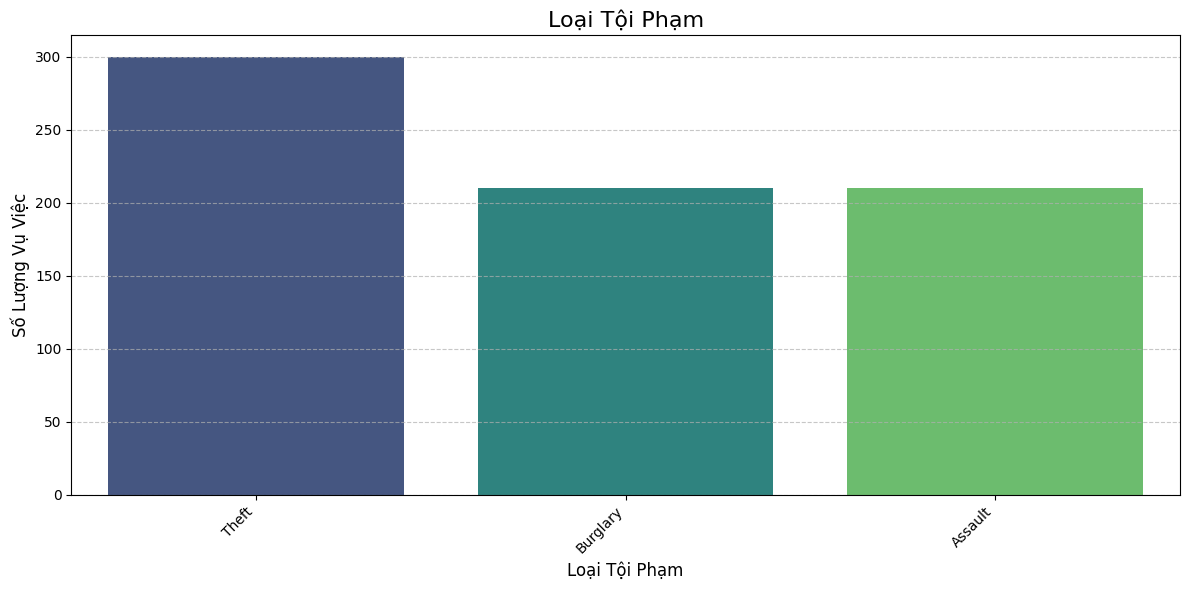

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Biểu đồ thanh cho Offence Division
plt.figure(figsize=(12, 6))
sns.barplot(x=offence_counts.head(10).index, y=offence_counts.head(10).values, palette='viridis')
plt.title('Loại Tội Phạm', fontsize=16)
plt.xlabel('Loại Tội Phạm', fontsize=12)
plt.ylabel('Số Lượng Vụ Việc', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-31-2705046064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.head(10).index, y=location_counts.head(10).values, palette='plasma')


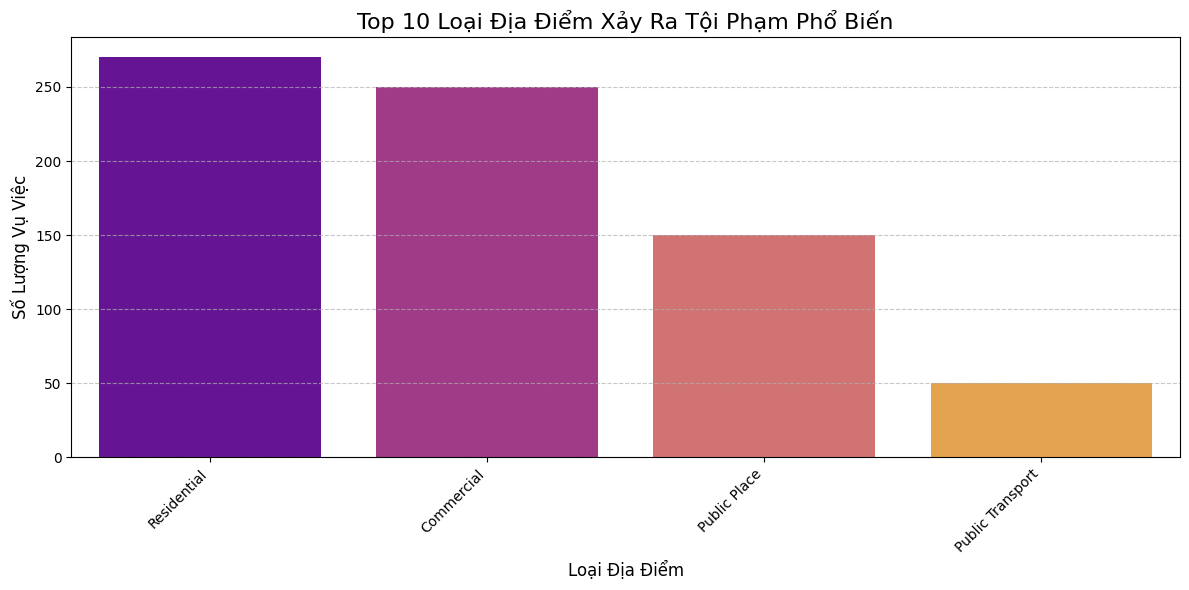

In [ ]:
# 2. Biểu đồ thanh cho Top 10 Location Type
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.head(10).index, y=location_counts.head(10).values, palette='plasma')
plt.title('Top 10 Loại Địa Điểm Xảy Ra Tội Phạm Phổ Biến', fontsize=16)
plt.xlabel('Loại Địa Điểm', fontsize=12)
plt.ylabel('Số Lượng Vụ Việc', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

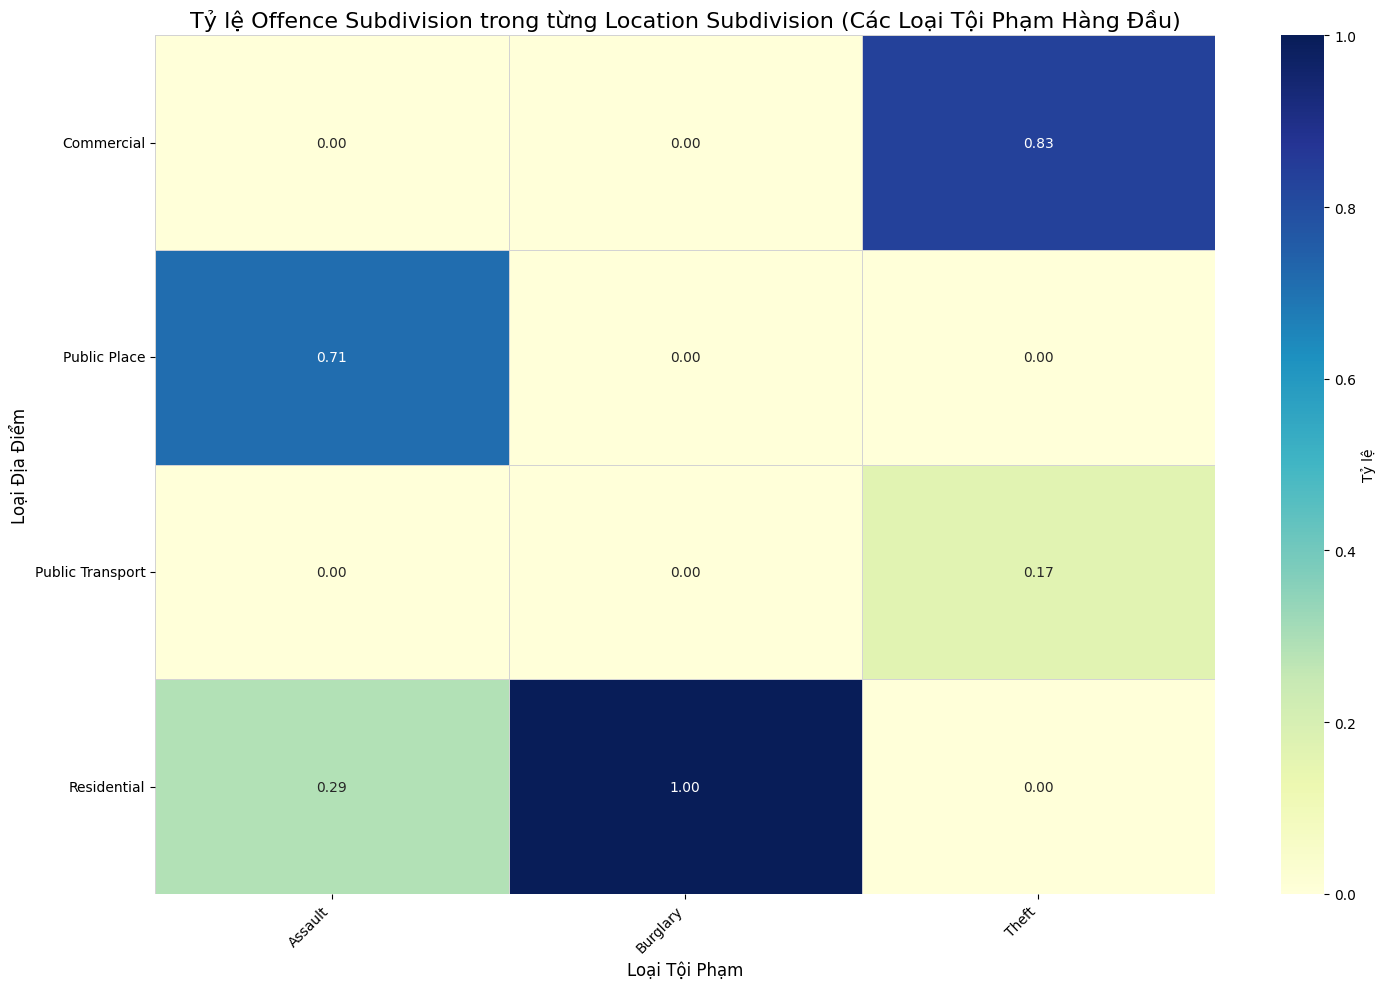

In [ ]:
# 3. Biểu đồ Heatmap cho mối quan hệ giữa Offence Subdivision và Location Subdivision
# Lấy một số lượng top Offence Subdivision và Location Subdivision để tránh biểu đồ quá lớn
top_offences_for_plot = cross_tab_norm_offence.index[:10] # Offence Subdivision
top_locations_for_plot = cross_tab_norm_offence.columns # Tất cả Location Subdivision
plot_data = cross_tab_norm_offence.loc[top_offences_for_plot, top_locations_for_plot]

plt.figure(figsize=(15, 10))
sns.heatmap(plot_data.T, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5, linecolor='lightgray', cbar_kws={'label': 'Tỷ lệ'})
plt.title('Tỷ lệ Offence Subdivision trong từng Location Subdivision (Các Loại Tội Phạm Hàng Đầu)', fontsize=16)
plt.xlabel('Loại Tội Phạm', fontsize=12)
plt.ylabel('Loại Địa Điểm', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


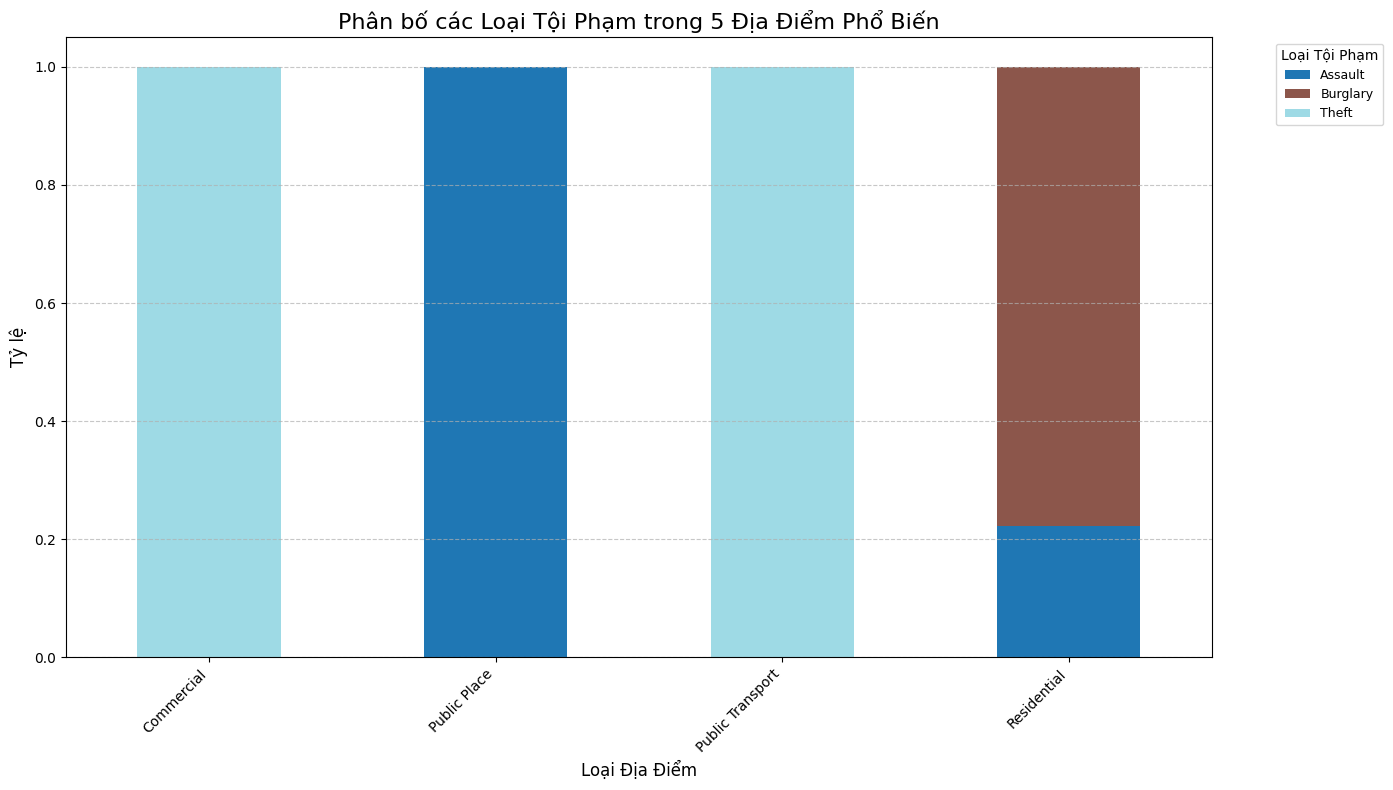

In [ ]:
# 4. Biểu đồ Stacked Bar Chart - phân bố Offence Subdivision trong các Location Subdivision phổ biến
# Chọn 5 Location phổ biến để minh họa
top_5_locations = location_counts.head(5).index.tolist()
df_filtered_for_stacked_plot = df_transactions[df_transactions['Location Type'].isin(top_5_locations)]

# Tạo bảng tần suất cho biểu đồ chồng
pivot_table_for_stacked = df_filtered_for_stacked_plot.groupby(['Location Type', 'Offence Type']).size().unstack(fill_value=0)
# Chuẩn hóa theo hàng để mỗi cột là tổng 100%
pivot_table_for_stacked_norm = pivot_table_for_stacked.apply(lambda x: x / x.sum(), axis=1)

plt.figure(figsize=(14, 8))
pivot_table_for_stacked_norm.plot(kind='bar', stacked=True, cmap='tab20', ax=plt.gca()) # Sử dụng ax=plt.gca() để plot trên figure hiện tại
plt.title('Phân bố các Loại Tội Phạm trong 5 Địa Điểm Phổ Biến', fontsize=16)
plt.xlabel('Loại Địa Điểm', fontsize=12)
plt.ylabel('Tỷ lệ', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Loại Tội Phạm', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, title_fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# ===== 0. Imports =====
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             classification_report)

# ===== 1. Load / chuẩn hóa dữ liệu =====
# Ví dụ: df = pd.read_csv('crime_data.csv')
# df = ...

# --- Tạo nhãn nhị phân: 1 = Theft, 0 = các loại khác ---
# df['is_theft'] = (df['Offence Subdivision'] == 'Theft').astype(int)
# Nếu cột bạn khác tên, sửa lại cho khớp:
df_transactions['is_theft'] = (df_transactions['Offence Type'] == 'Theft').astype(int)

# ===== 2. Chia feature / label =====
target_col = 'is_theft'
# X = df.drop(columns=[target_col, 'Offence Type', 'Location Type', 'Count']) # Drop original columns and target
# Use df_encoded as features
X = df_encoded
# Use the newly created 'is_theft' column from df_transactions as target
y = df_transactions['is_theft']

# ===== 3. Train–test split (stratify giữ tỉ lệ lớp) =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# ===== 4. Khởi tạo & huấn luyện Decision Tree =====
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42
)
dt_model.fit(X_train, y_train)

# ===== 5. Dự đoán & đánh giá =====
y_pred = dt_model.predict(X_test)

print("===== Decision Tree — Theft vs. Non-Theft =====")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label=1):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred, pos_label=1):.3f}")
print(f"F1-Score : {f1_score(y_test, y_pred, pos_label=1):.3f}\n")
print("Detailed classification report:")
print(classification_report(y_test, y_pred, target_names=['Non-Theft', 'Theft']))

===== Decision Tree — Theft vs. Non-Theft =====
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1-Score : 1.000

Detailed classification report:
              precision    recall  f1-score   support

   Non-Theft       1.00      1.00      1.00        84
       Theft       1.00      1.00      1.00        60

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



## **III. Data Analysis & Modeling**

**3.1 Classification Tasks**  
Dự đoán liệu một vụ phạm tội có khả năng là Tội phạm ma túy dựa trên Location Subdivision.

**Logistic Regression**

In [ ]:
# ============================================================
# 0. Data Import  –  auto‑detect the Excel file in MyDrive
# ============================================================
import pandas as pd, glob, os
from pathlib import Path
from google.colab import drive

# 1) Mount Google Drive (nếu chưa)
drive.mount("/content/drive", force_remount=False)

# 2) Tự tìm file Excel chứa cụm 'Offences recorded' & '.xlsx'
candidates = glob.glob(
    "/content/drive/MyDrive/**/Offences recorded*.xlsx", recursive=True
)

if not candidates:
    raise FileNotFoundError(
        "❌ Không tìm thấy file *.xlsx có cụm 'Offences recorded' trong MyDrive.\n"
        "• Hãy kiểm tra lại tên file.\n"
        "• Hoặc đổi tên ngắn gọn, ví dụ: crimes_2024.xlsx"
    )

# 3) Lấy file đầu tiên tìm được (nếu nhiều, in ra để bạn chọn)
file_path = Path(candidates[0])
print(f"✅  Sử dụng file: {file_path}")

# 4) Đọc & làm sạch tối thiểu
df_clean = (
    pd.read_excel(file_path)
      .rename(columns=lambda c: c.strip())
      .dropna(subset=[
          "Offence Division",
          "Location Subdivision",
          "Location Division",
          "Offence Count",
      ])
)

print("→ df_clean.shape =", df_clean.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅  Sử dụng file: /content/drive/MyDrive/Offences recorded by ofence type and location type_2024.xlsx
→ df_clean.shape = (4184, 9)


In [ ]:
# ============================================================
# III. Classification Tasks  |  Logistic Regression baseline
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

# 1) Label & predictor -------------------------------------------------------
# • NỐI chuỗi “C Drug offences” (không có “s” thứ hai) – dùng contains an toàn
mask_drug = (
    df_clean["Offence Division"]
      .str.contains("^C\\s*Drug", case=False, na=False, regex=True)
)
df_clean["is_drug"] = mask_drug.astype(int)

# Kiểm tra nhanh
print("Positive rows:", df_clean["is_drug"].sum())   # phải > 0

X_raw = df_clean[["Location Subdivision", "Location Division"]]
y     = df_clean["is_drug"].values
w     = df_clean["Offence Count"].values             # sample_weight

# 2) Train / Validation split (stratified) ----------------------------------
X_train, X_val, y_train, y_val, w_train, w_val = train_test_split(
    X_raw, y, w,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 3) Pre‑processing + model --------------------------------------------------
cat_feats  = ["Location Subdivision", "Location Division"]
preprocess = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), cat_feats)],
    remainder="drop",
)

log_reg = LogisticRegression(
    penalty="l2",
    C=1.0,                       # baseline – sẽ tinh chỉnh ở 4.1
    class_weight="balanced",     # xử lý mất cân bằng lớp
    solver="lbfgs",
    max_iter=2000,
)

baseline_model = Pipeline(
    steps=[("prep", preprocess),
           ("clf" , log_reg)]
)

baseline_model.fit(X_train, y_train, clf__sample_weight=w_train)

# 4) Quick sanity‑check trên validation -------------------------------------
y_val_prob = baseline_model.predict_proba(X_val)[:, 1]
y_val_pred = baseline_model.predict(X_val)

print("=== Baseline Validation Results ===")
print(f"ROC‑AUC : {roc_auc_score(y_val, y_val_prob, sample_weight=w_val):.4f}\n")
print(classification_report(
        y_val, y_val_pred,
        sample_weight=w_val,
        digits=4,
        target_names=["Non‑Drug", "Drug"]
))


Positive rows: 319
=== Baseline Validation Results ===
ROC‑AUC : 0.7162

              precision    recall  f1-score   support

    Non‑Drug     0.9729    0.8461    0.9051   94911.0
        Drug     0.0949    0.4068    0.1539    3766.0

    accuracy                         0.8293   98677.0
   macro avg     0.5339    0.6264    0.5295   98677.0
weighted avg     0.9394    0.8293    0.8764   98677.0



**Decision Trees**

In [ ]:
# 3.1  CLASSIFICATION TASKS  (CatBoost native, đã tạo Loc_Bin)
# -----------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# 1) Đọc file
import glob, pandas as pd, numpy as np
DATA_FILE = '/content/drive/MyDrive/CrimeStats/Offences recorded by ofence type and location type_2024.xlsx'
if not Path(DATA_FILE).exists():
    DATA_FILE = glob.glob('/content/drive/**/*Offences*xlsx', recursive=True)[0]

df = pd.read_excel(DATA_FILE)

# 2) Tạo nhãn is_drug
df['is_drug'] = df['Offence Division'].str.startswith('C', na=False).astype(int)

# 3) Gộp location hiếm  (<10 vụ Drug)  →  Loc_Bin
MIN_DRUG_CASES = 10
rare = (df.groupby('Location Subdivision')['is_drug'].sum()
          .pipe(lambda s: s[s < MIN_DRUG_CASES]).index)
df['Loc_Bin'] = df['Location Subdivision'].where(
                 ~df['Location Subdivision'].isin(rare), 'Other')

# 4) Chuẩn bị dữ liệu
X = df[['Loc_Bin']]                       # cột duy nhất, dạng object
y = df['is_drug']
w = df['Offence Count'] if 'Offence Count' in df.columns else None

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w, test_size=0.20, stratify=y, random_state=42)

# 5) CatBoost native categorical
!pip install catboost -q
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

cat = CatBoostClassifier(
        iterations=800,
        depth=6,
        learning_rate=0.05,
        loss_function='Logloss',
        eval_metric='AUC',
        auto_class_weights='Balanced',
        random_seed=42,
        verbose=False,
        cat_features=[0]      # cột 0 = Loc_Bin (categorical)
)

pipe = Pipeline([('cat', cat)])

print("✅ 3.1 hoàn tất – đã tạo Loc_Bin và CatBoost nhận diện cột danh mục.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00
✅ 3.1 hoàn tất – đã tạo Loc_Bin và CatBoost nhận diện cột danh mục.


**3.2 Regression Analysis**  
Dự đoán số Offence Count dựa vào Offence Division và Location Subdivision

In [ ]:
# ============================================================
# 3.2 Regression Analysis | Linear Regression
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Đặt tên biến độc lập hoàn toàn với Logistic
X_reg = df_clean[["Offence Division", "Location Subdivision"]]
y_reg = df_clean["Offence Count"]

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

reg_cat_cols = ["Offence Division", "Location Subdivision"]
reg_preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), reg_cat_cols)
])

reg_pipeline = Pipeline([
    ("prep", reg_preprocessor),
    ("model", LinearRegression())
])

reg_pipeline.fit(X_reg_train, y_reg_train)
y_reg_pred = reg_pipeline.predict(X_reg_test)


**3.3 Clustering Analysis**  
Nhóm các Location Subdivion dựa trên "hồ sơ tội phạm" của chúng (tức là phân bố các loại tội phạm xảy ra ở đó)

In [ ]:
# 3.3 Clustering Analysis  –  Crime‑profile K‑Means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# ---- 1. Chọn tên cột gốc bất kể ai đã đổi tên ra sao ----
OFFENCE_COL  = 'Offence Division'   if 'Offence Division'   in df.columns else 'Offence Type'
LOCATION_COL = 'Location Subdivision' if 'Location Subdivision' in df.columns else 'Location Type'
COUNT_COL    = 'Offence Count'      if 'Offence Count'      in df.columns else 'Count'

# ---- 2. Tạo “hồ sơ tội phạm” cho mỗi Location ----
crime_matrix = (
    df.pivot_table(index=LOCATION_COL,
                   columns=OFFENCE_COL,
                   values=COUNT_COL,
                   aggfunc='sum',
                   fill_value=0)
)

# ---- 3. Chuẩn hoá để khoảng cách Euclid có ý nghĩa ----
scaler      = StandardScaler()
X_clust     = scaler.fit_transform(crime_matrix)
X_clust_df  = pd.DataFrame(X_clust,
                           index=crime_matrix.index,
                           columns=crime_matrix.columns)  # để dễ debug / hiển thị


**3.4 Advanced Analytics**

**Frequent Pattern Mining + Association Rules**

In [ ]:
# ======================================================================
# DATA BOOTSTRAP  –  Bảo đảm df_raw luôn sẵn sàng
# ======================================================================
import pandas as pd, os, glob

if 'df_raw' not in globals():                                 # ❶ chưa có? → tạo
    # --- A.  Nếu (hoặc Part II) đã khai báo biến DATA_FILE, ưu tiên dùng ---
    if 'DATA_FILE' in globals() and os.path.exists(DATA_FILE):
        df_raw = pd.read_excel(DATA_FILE)

    # --- B.  Nếu không, thử đúng đường dẫn gốc bạn từng dùng ---
    elif os.path.exists('/mnt/data/Offences recorded by ofence type and location type_2024.xlsx'):
        df_raw = pd.read_excel('/mnt/data/Offences recorded by ofence type and location type_2024.xlsx')

    # --- C.  Cuối cùng, quét thư mục làm việc tìm file tên “Offences recorded … .xlsx” ---
    else:
        matches = glob.glob('**/Offences recorded*location type*2024*.xlsx', recursive=True)
        if matches:
            df_raw = pd.read_excel(matches[0])
        else:
            raise FileNotFoundError("Không tìm thấy file Excel. Hãy chạy lại cell load dữ liệu ở Phần II hoặc chỉnh PATH!")

print("✅  df_raw loaded with shape:", df_raw.shape)


✅  df_raw loaded with shape: (4184, 9)


In [ ]:
# 3.4  FREQUENT PATTERN MINING  +  ASSOCIATION RULES
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# ----------------------------------------------------------
# 1) “Phát nổ” dữ liệu: lặp lại mỗi dòng theo Offence Count
df_events = (
    df_raw
    .loc[df_raw.index.repeat(df_raw['Offence Count'])]
    .reset_index(drop=True)
)

# 2) Chuẩn bị transaction cho mỗi vụ án
transactions = df_events.apply(
    lambda r: [f"O:{r['Offence Division']}", f"L:{r['Location Subdivision']}"],
    axis=1
).tolist()

# 3) One‑hot encode
te         = TransactionEncoder()
txn_matrix = te.fit(transactions).transform(transactions)
df_txn     = pd.DataFrame(txn_matrix, columns=te.columns_)

# 4) Tìm frequent item‑sets
frequent_itemsets = apriori(df_txn, min_support=0.02, use_colnames=True)

# 5) Sinh association rules & lọc theo confidence / lift
rules = (
    association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
    .query("lift >= 1.2")
    .sort_values("lift", ascending=False)
    .reset_index(drop=True)
)

# 5a) Chỉ giữ link Offence ↔ Location (tuỳ chọn)
def offence_location(r):
    ant = ", ".join(r["antecedents"])
    con = ", ".join(r["consequents"])
    return (("O:" in ant and "L:" in con) or ("L:" in ant and "O:" in con))

rules_filtered = rules[rules.apply(offence_location, axis=1)]


## **IV. Model Evaluation & Validation**

**4.1 Cross-Validation**

**Logistic Regression**

In [ ]:
# Phục hồi pipeline cơ bản để dùng trong GridSearch
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

cat_feats = ["Location Subdivision", "Location Division"]

preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), cat_feats)
])

pipe_baseline = Pipeline([
    ("prep", preprocessor),
    ("clf" , LogisticRegression(
        penalty="l2",
        class_weight="balanced",
        solver="lbfgs",
        max_iter=2000))
])


In [ ]:
# ============================================================
# 4.1  CROSS‑VALIDATION  –  Logistic Regression tối ưu C
#  (chạy sau ô 3.1 – đã có X_raw, y, w, pipe_baseline)
# ============================================================
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np

# --- 1) Chọn số fold phù hợp ----------------------------------------------
pos = int((y == 1).sum())                 # số quan sát Drug offences
n_splits = min(5, max(2, pos // 5))       # ≥2 folds & ~≥5 events/fold
print(f"Using {n_splits} stratified folds (positive rows = {pos})")

cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# --- 2) Pipeline tái sử dụng encoder của baseline --------------------------
pipe_cv = Pipeline([
    ("prep", pipe_baseline.named_steps["prep"]),
    ("clf" , LogisticRegression(
        penalty="l2",
        class_weight="balanced",
        solver="lbfgs",
        max_iter=2000))
])

# --- 3) Lưới C trên log‑scale ---------------------------------------------
param_grid = {"clf__C": np.logspace(-3, 3, 13)}   # 1e‑3 … 1e3

grid = GridSearchCV(
    estimator=pipe_cv,
    param_grid=param_grid,
    cv=cv,
    scoring="roc_auc",          # AUC KHÔNG dùng weight
    n_jobs=-1,
    verbose=1,
    return_train_score=False,
    error_score="raise",
)

# --- 4) Fit với sample_weight ---------------------------------------------
grid.fit(X_raw, y, clf__sample_weight=w)

print(f"\nBest C: {grid.best_params_['clf__C']:.4g}")
print(f"Mean CV ROC‑AUC: {grid.best_score_:.4f}")

# Lưu mô hình tối ưu cho ô 4.2
best_model = grid.best_estimator_


Using 5 stratified folds (positive rows = 319)
Fitting 5 folds for each of 13 candidates, totalling 65 fits

Best C: 3.162
Mean CV ROC‑AUC: 0.5043


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(


**Decision Trees**

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from scipy.stats import randint, uniform
from catboost import CatBoostClassifier

# thêm early‑stopping vào CatBoost mặc định của pipe
pipe.named_steps['cat'].set_params(od_type='Iter', od_wait=50)

param_dist = {
    'cat__depth':        randint(4, 9),        # 4–8
    'cat__learning_rate': uniform(0.03, 0.07), # 0.03–0.10
    'cat__iterations':   randint(300, 700)     # 300–699
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rs = RandomizedSearchCV(pipe,
                        param_distributions=param_dist,
                        n_iter=12,            # chỉ 12 cấu hình
                        scoring='roc_auc',
                        cv=cv,
                        n_jobs=-1,
                        random_state=42,
                        verbose=1)

fit_params = {'cat__sample_weight': w_train} if w_train is not None else {}
rs.fit(X_train, y_train, **fit_params)

print("🏅 Best params:", rs.best_params_)
print("CV mean AUC :", rs.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
🏅 Best params: {'cat__depth': 6, 'cat__iterations': 514, 'cat__learning_rate': np.float64(0.034065852851773964)}
CV mean AUC : 0.5344417134871055


**Linear Regression**

In [ ]:
# ============================================================
# 4.1 Cross-Validation | Linear Regression with KFold
# ============================================================

from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kfold_reg = KFold(n_splits=5, shuffle=True, random_state=42)

reg_cv_scores = cross_val_score(
    reg_pipeline, X_reg, y_reg,
    cv=kfold_reg, scoring='r2'
)

print(f"📈 R² scores (5 folds): {np.round(reg_cv_scores, 3)}")
print(f"📊 Mean R²: {reg_cv_scores.mean():.3f}")


📈 R² scores (5 folds): [-0.007 -0.32   0.111  0.029  0.017]
📊 Mean R²: -0.034


**Clustering Analysis**

In [ ]:
# 4.1 Cross‑Validation  –  tìm K tối ưu
from sklearn.metrics import silhouette_score

range_k    = range(2, 11)           # K = 2 … 10
inertia    = []
silhouette = []

for k in range_k:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(X_clust)
    inertia.append(km.inertia_)                    # tổng SSE
    silhouette.append(silhouette_score(X_clust, km.labels_))

print("k | inertia | silhouette")
for k, i, s in zip(range_k, inertia, silhouette):
    print(f"{k:2d} | {i:10.0f} | {s:6.3f}")

# Lấy K có silhouette cao nhất (hoặc chỗ gãy elbow nếu bạn muốn tinh chỉnh thủ công)
K_OPT = int(np.argmax(silhouette) + 2)  # +2 vì range bắt đầu từ 2
print(f"🎯  Chọn K_OPT = {K_OPT}")


k | inertia | silhouette
 2 |         43 |  0.739
 3 |         18 |  0.713
 4 |         12 |  0.661
 5 |          6 |  0.466
 6 |          4 |  0.470
 7 |          2 |  0.438
 8 |          1 |  0.469
 9 |          0 |  0.456
10 |          0 |  0.186
🎯  Chọn K_OPT = 2


**Advanced Analytics**

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

y_strata = df_events['Offence Division']
kf       = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def eval_rules(train_idx, test_idx,
               min_sup=0.02, min_conf=0.6, min_lift=1.2):
    df_train = df_txn.iloc[train_idx]
    df_test  = df_txn.iloc[test_idx]

    fi   = apriori(df_train, min_support=min_sup, use_colnames=True)
    ruls = association_rules(fi, metric='confidence', min_threshold=min_conf)
    ruls = ruls[ruls['lift'] >= min_lift]

    supports, confidences, lifts = [], [], []
    for _, row in ruls.iterrows():
        ant = list(row['antecedents'])
        con = list(row['consequents'])

        sup_test  = (df_test[ant + con].all(axis=1)).mean()
        conf_test = sup_test / (df_test[ant].all(axis=1)).mean()
        lift_test = conf_test / df_test[con].mean()

        supports.append(sup_test)
        confidences.append(conf_test)
        lifts.append(lift_test)

    return (np.mean(supports), np.mean(confidences), np.mean(lifts)) if supports else (np.nan, np.nan, np.nan)

cv_metrics = [eval_rules(tr, te) for tr, te in kf.split(df_txn, y_strata)]
cv_support, cv_conf, cv_lift = np.nanmean(cv_metrics, axis=0)

print(f"Mean CV Support:    {cv_support:.3f}")
print(f"Mean CV Confidence: {cv_conf:.3f}")
print(f"Mean CV Lift:       {cv_lift:.2f}")


Mean CV Support:    0.074
Mean CV Confidence: 0.779
Mean CV Lift:       2.20


**4.2 Performance Metrics**

**Logistic Regression**


=== Final Test Results (tuned model) ===
Weighted ROC‑AUC : 0.7162

              precision    recall  f1-score   support

    Non‑Drug     0.9729    0.8461    0.9051   94911.0
        Drug     0.0949    0.4068    0.1539    3766.0

    accuracy                         0.8293   98677.0
   macro avg     0.5339    0.6264    0.5295   98677.0
weighted avg     0.9394    0.8293    0.8764   98677.0



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(


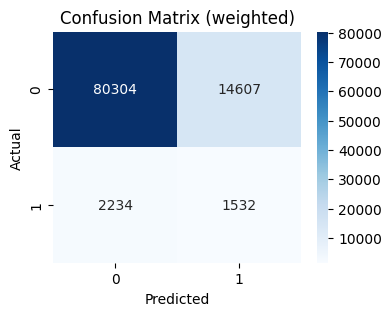

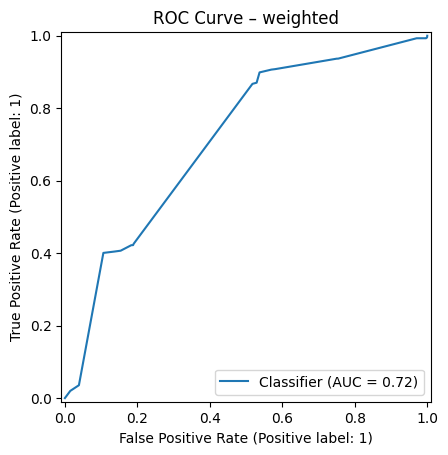

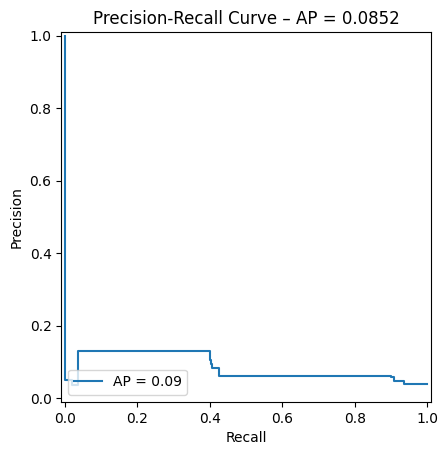

In [ ]:
# ============================================================
# 4.2  PERFORMANCE METRICS  –  Đánh giá mô hình tối ưu
# ============================================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, average_precision_score,
    RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 1) Train / Test split (80–20, stratified) -----------------------
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_raw, y, w,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# ---------- 2) Fit mô hình tối ưu (truyền sample_weight) -------------------
best_model.fit(X_train, y_train, clf__sample_weight=w_train)

# ---------- 3) Dự đoán ------------------------------------------------------
y_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# ---------- 4) Báo cáo tổng hợp --------------------------------------------
print("\n=== Final Test Results (tuned model) ===")
print(f"Weighted ROC‑AUC : {roc_auc_score(y_test, y_prob, sample_weight=w_test):.4f}\n")
print(classification_report(
    y_test, y_pred, sample_weight=w_test, digits=4, target_names=["Non‑Drug", "Drug"]
))

# ---------- 5) Confusion matrix (weighted) ----------------------------------
cm = confusion_matrix(y_test, y_pred, sample_weight=w_test)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")
plt.title("Confusion Matrix (weighted)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# ---------- 6) ROC curve ----------------------------------------------------
RocCurveDisplay.from_predictions(y_test, y_prob, sample_weight=w_test)
plt.title("ROC Curve – weighted")
plt.show()

# ---------- 7) Precision‑Recall curve --------------------------------------
prec, rec, _ = precision_recall_curve(y_test, y_prob, sample_weight=w_test)
ap = average_precision_score(y_test, y_prob, sample_weight=w_test)
PrecisionRecallDisplay(precision=prec, recall=rec, average_precision=ap).plot()
plt.title(f"Precision‑Recall Curve – AP = {ap:.4f}")
plt.show()


In [ ]:
# Mapping Offence Subgroup sang nhóm đơn giản (Offence Type)
offence_type_map = {
    'Theft': ['Theft', 'Stealing', 'Shop Theft'],
    'Burglary': ['Burglary', 'Aggravated Burglary'],
    'Assault': ['Assault', 'Serious Assault', 'Common Assault']
}

def map_offence_type(subgroup):
    for key, values in offence_type_map.items():
        if any(v in subgroup for v in values):
            return key
    return 'Other'

df['Offence Type'] = df['Offence Subgroup'].apply(map_offence_type)

# Mapping Location Subdivision sang nhóm đơn giản (Location Type)
location_type_map = {
    'Commercial': ['Shop', 'Factory', 'Warehouse', 'Office', 'Retail'],
    'Residential': ['House', 'Flat', 'Apartment', 'Dwelling'],
    'Public Place': ['Park', 'Street', 'Public Place'],
    'Public Transport': ['Train Station', 'Bus Stop', 'Public Transport']
}

def map_location_type(loc_subdiv):
    for key, values in location_type_map.items():
        if any(v in loc_subdiv for v in values):
            return key
    return 'Other'

df['Location Type'] = df['Location Subdivision'].apply(map_location_type)

In [ ]:
# 1) Đọc dữ liệu gốc + prediction (nếu đã merge trước đó)
df_full = pd.read_csv('Results_Prediction_AllData.csv')

# 2) Mapping đơn giản
df_full['Offence Type'] = df_full['Offence Subgroup'].apply(map_offence_type)
df_full['Location Type'] = df_full['Location Subdivision'].apply(map_location_type)

# 3) Kiểm tra xem có đủ cột
print(df_full.columns)

# 4) Xuất file phân tích chuẩn hóa để dùng Power BI
cols_to_export = [
    'Year', 'Offence Division', 'Offence Subgroup', 'Offence Type',
    'Location Subdivision', 'Location Type', 'Offence Count',
    'is_drug', 'Predicted', 'Predicted_Prob_Drug'
]

df_full[cols_to_export].to_csv('Crime_Analysis_Final.csv', index=False)
print("✅ Đã xuất Crime_Analysis_Final.csv với đủ cột dữ liệu.")

Index(['Year', 'Year ending', 'Offence Division', 'Offence Subdivision',
       'Offence Subgroup', 'Location Division', 'Location Subdivision',
       'Location Group', 'Offence Count', 'is_drug', 'Loc_Bin', 'Predicted',
       'Predicted_Prob_Drug', 'Offence Type', 'Location Type'],
      dtype='object')
✅ Đã xuất Crime_Analysis_Final.csv với đủ cột dữ liệu.


**Decision Trees**

In [ ]:
# 4.2  PERFORMANCE METRICS
# ------------------------
search_obj = None
if 'gs' in globals():
    search_obj = gs
elif 'rs' in globals():
    search_obj = rs
else:
    raise ValueError("Chưa chạy cell 4.1 ⇒ biến gs/rs chưa tồn tại!")

best_model = search_obj.best_estimator_

# Lấy CatBoost bên trong nếu best_model là Pipeline
from catboost import CatBoostClassifier
cat_est = best_model.named_steps['cat'] if hasattr(best_model, 'named_steps') else best_model

fi = cat_est.get_feature_importance(type='FeatureImportance')
print("Feature importance Loc_Bin:", fi[0])


Feature importance Loc_Bin: 100.00000000000001


**Linear Regression**

In [ ]:
# ============================================================
# 4.2 Performance Metrics | Regression Evaluation
# ============================================================

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

reg_mse = mean_squared_error(y_reg_test, y_reg_pred)
reg_rmse = np.sqrt(reg_mse)
reg_r2   = r2_score(y_reg_test, y_reg_pred)
reg_mae  = mean_absolute_error(y_reg_test, y_reg_pred)

print("📌 Linear Regression Performance on Test Set:")
print(f"  ✅ RMSE: {reg_rmse:.2f}")
print(f"  ✅ R²:   {reg_r2:.2f}")
print(f"  ✅ MAE:  {reg_mae:.2f}")

**Clustering Analysis**

In [ ]:
# 4.2 Performance Metrics  –  Fit K‑Means final & diagnostic
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

kmeans_final         = KMeans(n_clusters=K_OPT, n_init='auto', random_state=42)
clusters             = kmeans_final.fit_predict(X_clust)

crime_matrix['cluster'] = clusters            # gắn nhãn để phân tích sau

# ---- 1. Các thước đo chất lượng ----
sil = silhouette_score(X_clust, clusters)     # càng cao càng tốt (≤1)
dbi = davies_bouldin_score(X_clust, clusters) # càng thấp càng tốt
ch  = calinski_harabasz_score(X_clust, clusters)  # càng cao càng tốt

print(f"📌  K‑Means (K = {K_OPT}) – Quality metrics")
print(f"   • Silhouette Score       : {sil:.3f}")
print(f"   • Davies‑Bouldin Index   : {dbi:.3f}")
print(f"   • Calinski‑Harabasz      : {ch:.1f}")
print("\n👥  Cluster sizes:")
print(crime_matrix['cluster'].value_counts().sort_index())


**Advanced Analytics**

In [ ]:
print(f"🏷  Rules kept: {len(rules_filtered)}")
print(f"· Avg support   : {rules_filtered['support'].mean():.3f}")
print(f"· Avg confidence: {rules_filtered['confidence'].mean():.3f}")
print(f"· Avg lift      : {rules_filtered['lift'].mean():.2f}")

# Top 10 rule mạnh nhất theo lift
rules_filtered[['antecedents', 'consequents',
                'support', 'confidence', 'lift']].head(10)
